In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
import os
import sys
print("at directory:", os.getcwd())
print("changing to root directory")
os.chdir("../..")
print("at directory:", os.getcwd())

at directory: /Users/wilka/git/research/jaxneurorl/projects/humansf
changing to root directory
at directory: /Users/wilka/git/research/jaxneurorl


In [4]:
import jax
from housemaze import maze
from housemaze import utils
from housemaze import renderer
from housemaze.human_dyna import utils as dyna_utils
from housemaze.human_dyna import mazes

from projects.humansf import housemaze_experiments
import os.path
import matplotlib.pyplot as plt
import numpy as np

In [5]:
image_dict = utils.load_image_dict()

No file specified for image dict.
Using: /Users/wilka/git/research/jaxneurorl/libraries/housemaze/housemaze/image_data.pkl


In [6]:
char2key, task_group_set, task_objects = housemaze_experiments.get_group_set(3)
char2key

No file specified for groups.
Using: /Users/wilka/git/research/jaxneurorl/libraries/housemaze/housemaze/human_dyna/list_of_groups.npy


{'A': 26, 'B': 40, 'C': 47, 'D': 43, 'E': 25, 'F': 30, 'G': 29, 'H': 27}

((224, 256, 3),
 ['empty', 'wall', 'apple_sliced', 'spoon', 'onion_sliced_cooked'])

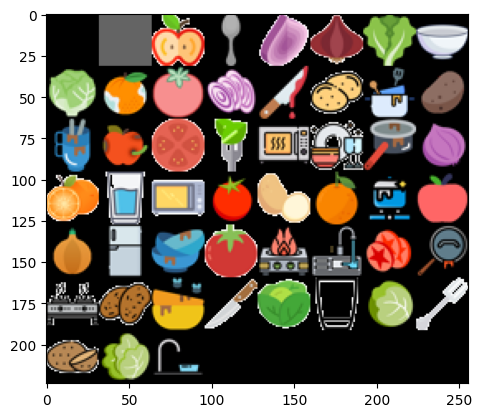

In [7]:
image = renderer.create_image_grid_from_image_tensor(image_dict['images'], max_cols=8)
plt.imshow(image)

image.shape, image_dict['keys'][:5]

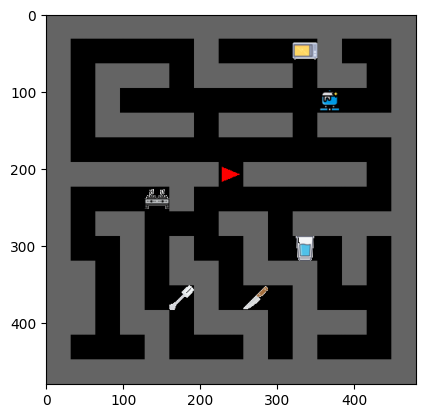

In [12]:
def render_maze(maze_str):
    level_init = utils.from_str(maze_str, char2key)
    image = renderer.create_image_from_grid(*level_init, image_dict)
    plt.imshow(image)
    plt.show()

def render_path(maze_str, goal):
    level_init = utils.from_str(maze_str, char2key)
    image = renderer.create_image_from_grid(*level_init, image_dict)
    path = utils.find_optimal_path(level_init[0], level_init[1], np.array([goal]))
    print(f"Path length: {len(path)}")
    actions = utils.actions_from_path(path)
    renderer.place_arrows_on_image(image, path, actions, *level_init[0].shape[:2])
    plt.show()

render_maze(mazes.maze0)
# render_maze(mazes.maze1)
# render_maze(mazes.maze2)
# render_maze(mazes.maze3)
# render_maze(mazes.maze4)

# Maze 3 Shortcut

Path length: 35


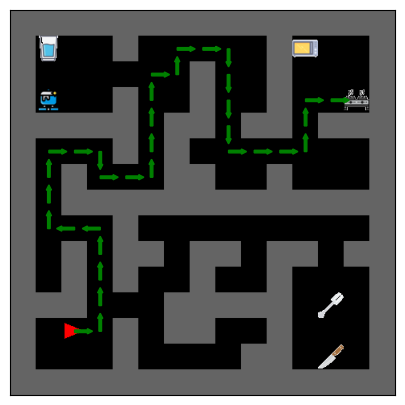

Path length: 21


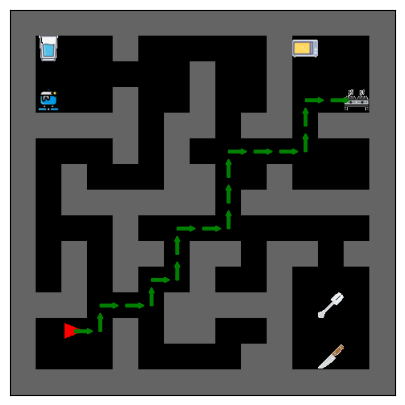

Path length: 29


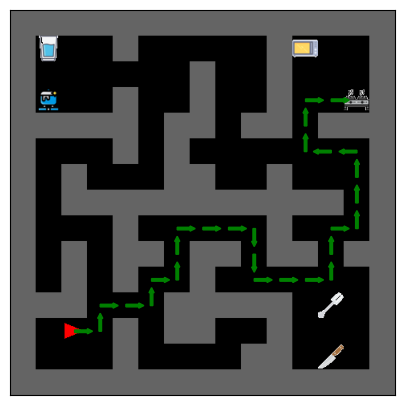

In [48]:
maze3_open = """
E..#.....#A..
......#..#...
F..#..#..#..B
##.#.##.##.##
...#.#.......
.#...##..#...
.###########.
...#......#..
.#.##.##.##.#
.#.#.....#...
##...###.#.C.
.>.#.##......
...#....##.D.
""".strip()

maze3_open2 = """
E..#.....#A..
......#..#...
F..#..#..#..B
####.##.##.##
...#.#.......
.#...##..#...
.###########.
...#.....#...
.#.##.##.##.#
.#.#..#......
##...#####.C.
.>.#.##..#...
...#....##.D.
""".strip()

render_path(mazes.maze3, goal=task_objects[1])
render_path(mazes.maze3_open, goal=task_objects[1])
render_path(mazes.maze3_open2, goal=task_objects[1])

# Plotting offpath

Path length: 35


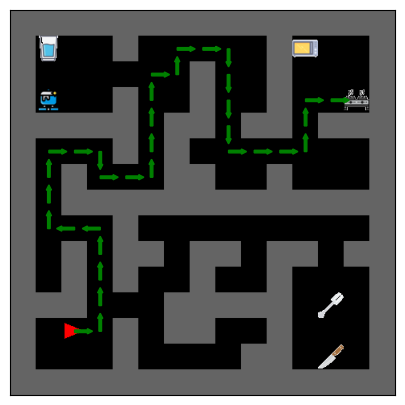

Path length: 27


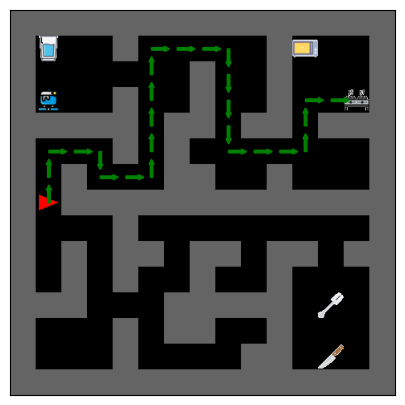

Path length: 27


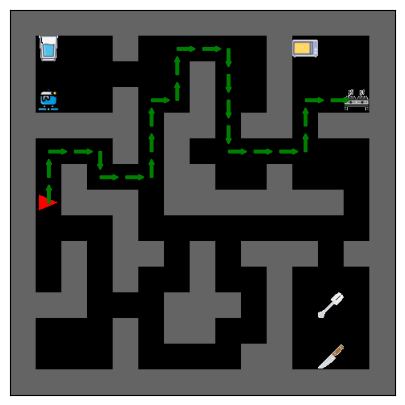

Path length: 23


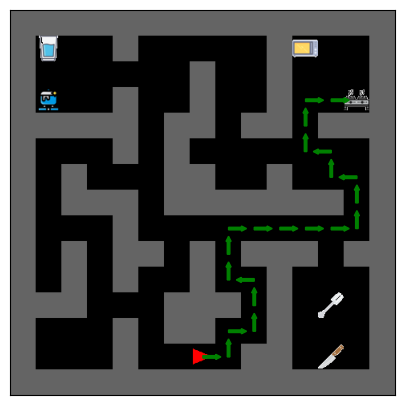

In [29]:
maze3_onpath = """
E..#.....#A..
......#..#...
F..#..#..#..B
####.##.##.##
...#.#.......
.#...##..#...
>############
...#.........
.#.##.##.##.#
.#.#..#..#...
##...#####.C.
...#.##..#...
...#....##.D.
""".strip()

render_path(mazes.maze3, goal=task_objects[1])
render_path(maze3_onpath, goal=task_objects[1])

maze3_onpath_shortcut = """
E..#.....#A..
......#..#...
F..#..#..#..B
####.##.##.##
...#.#.......
.#...##..#...
>###.#######.
...#.........
.#.##.#.###.#
.#.#..#..#...
##...###.#.C.
...#.##..#...
...#....##.D.
""".strip()
render_path(maze3_onpath_shortcut, goal=task_objects[1])

maze3_offpath_shortcut = """
E..#.....#A..
......#..#...
F..#..#..#..B
####.##.##.##
...#.#.......
.#...##..#...
.###.#######.
...#.........
.#.##.#.###.#
.#.#..#..#...
##...###.#.C.
...#.##..#...
...#..>.##.D.
""".strip()
render_path(maze3_offpath_shortcut, goal=task_objects[1])

# Plotting two paths

Path length: 30


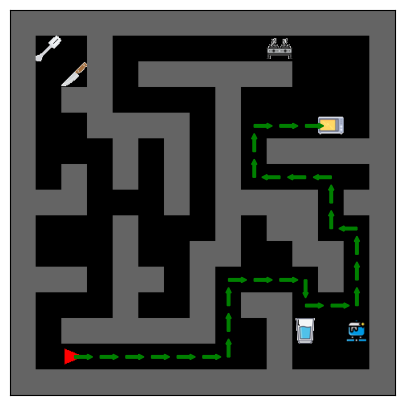

Path length: 31


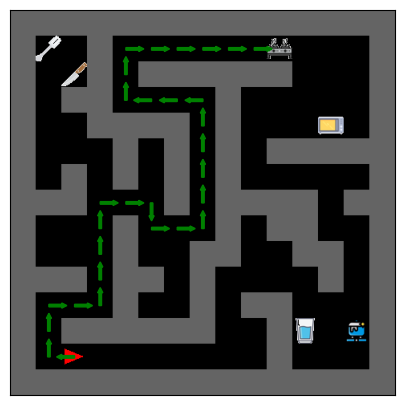

In [92]:
def render_path(maze_str, goal):
    level_init = utils.from_str(maze_str, char2key)
    image = renderer.create_image_from_grid(*level_init, image_dict)
    path = utils.find_optimal_path(level_init[0], level_init[1], np.array([goal]))
    print(f"Path length: {len(path)}")
    actions = utils.actions_from_path(path)
    renderer.place_arrows_on_image(image, path, actions, *level_init[0].shape[:2])
    plt.show()


maze5 = """
C.#......B...
.D#.######...
.##....#.....
..####.#.....
...#.#.#.###A
.#.#.#.#...#.
##...#.###.##
...#...#.#...
...#..##.###.
##.##.#....#.
...#..#.##...
.######..#E.F
.>.......#...
""".strip()

maze5 = mazes.maze5

render_path(maze5, goal=task_objects[0])
render_path(maze5, goal=task_objects[1])


# # offtask = task_objects[1]


In [29]:
level_init[0].shape

(13, 13, 1)